In [1]:
import pandas as pd
import numpy as np

URL = https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv

In [2]:
pumpkins = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv')
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
1756,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/29/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"MINIATURE LOWER, OTHERS STEADY."


In [3]:
# Check if there is missing data in the current dataframe:
print(pumpkins.shape)
pumpkins.isnull().sum()

(1757, 26)


City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [17]:
# Alternative to next cell
new_data = pumpkins.dropna(axis = 1, how ='any')
new_data

,City Name,Package,Date,Low Price,High Price,Repack
0,BALTIMORE,24 inch bins,4/29/17,270.00,280.00,E
1,BALTIMORE,24 inch bins,5/6/17,270.00,280.00,E
2,BALTIMORE,24 inch bins,9/24/16,160.00,160.00,N
3,BALTIMORE,24 inch bins,9/24/16,160.00,160.00,N
4,BALTIMORE,24 inch bins,11/5/16,90.00,100.00,N
...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,9/30/16,14.75,14.75,N
1753,ST. LOUIS,36 inch bins,9/26/16,275.00,275.00,N
1754,ST. LOUIS,36 inch bins,9/27/16,275.00,275.00,N
1755,ST. LOUIS,36 inch bins,9/28/16,275.00,275.00,N


**Convert the dates to a month format (these are US dates, so the format is MM/DD/YYYY).
Extract the month to a new column.**


In [4]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.00,280.00
1,24 inch bins,5/6/17,270.00,280.00
2,24 inch bins,9/24/16,160.00,160.00
3,24 inch bins,9/24/16,160.00,160.00
4,24 inch bins,11/5/16,90.00,100.00
...,...,...,...,...
1752,22 lb cartons,9/30/16,14.75,14.75
1753,36 inch bins,9/26/16,275.00,275.00
1754,36 inch bins,9/27/16,275.00,275.00
1755,36 inch bins,9/28/16,275.00,275.00


Second, determine average price of pumpkin
Think about how to determine the average price of a pumpkin in a given month. What columns would you pick for this task? Hint: you'll need 3 columns.

Solution: take the average of the Low Price and High Price columns to populate the new Price column, and convert the Date column to only show the month. Fortunately, according to the check above, there is no missing data for dates or prices.

In [5]:
pumpkins.shape

(1757, 4)

In [54]:
# Alternate shown below in trials
month = pd.DatetimeIndex(pumpkins['Date']).month 

In [55]:
# compute the avg
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
price

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64

In [56]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


### But wait! There's something odd here
If you look at the Package column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

Pumpkins seem very hard to weigh consistently

Digging into the original data, it's interesting that anything with Unit of Sale equalling 'EACH' or 'PER BIN' also have the Package type per inch, per bin, or 'each'. Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their Package column.

In [52]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [53]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [57]:
new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


 Did you notice that pumpkins sold by the half-bushel are very expensive? Can you figure out why? Hint: little pumpkins are way pricier than big ones, probably because there are so many more of them per bushel, given the unused space taken by one big hollow pie pumpkin.

## Visualisation
Visualizations can also help determine the machine learning technique most appropriate for the data. A scatterplot that seems to follow a line, for example, indicates that the data is a good candidate for a linear regression exercise.

In [58]:
import matplotlib.pyplot as plt

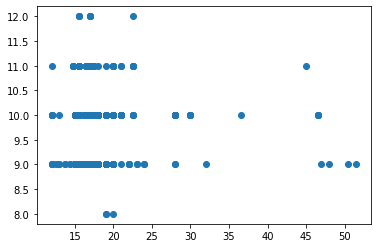

In [59]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

# It's not particularly useful as all it does is display in your data as a spread of points in a given month.



**To get charts to display useful data, you usually need to group the data somehow. Let's try creating a plot where the y axis shows the months and the data demonstrates the distribution of data.**

https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

Text(0, 0.5, 'Pumpkin Price')

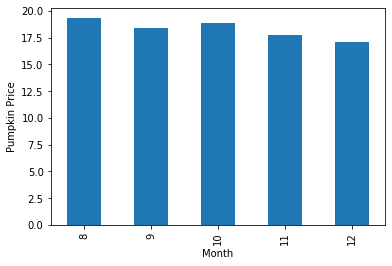

In [60]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")


## Trials


In [11]:
pumpkins['Date'] #MM/DD/YYYY

0       4/29/17
1        5/6/17
2       9/24/16
3       9/24/16
4       11/5/16
         ...   
1752    9/30/16
1753    9/26/16
1754    9/27/16
1755    9/28/16
1756    9/29/16
Name: Date, Length: 1757, dtype: object

In [14]:
month = pd.DatetimeIndex(pumpkins['Date'])
month.month

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)

In [39]:
t = pumpkins['Date']
# np.array(t)

fin = []
for i in t:
    ar = (i.split('/'))
    fin.append(int(ar[0]))
type(fin)

list

In [44]:
new2 = pd.DataFrame({
    'months' : fin,
    'Package': pumpkins['Package'], 
    'Low Price': pumpkins['Low Price'],
    'High Price': pumpkins['High Price'], 
    'Price': price   
})

In [45]:
new2

,months,Package,Low Price,High Price,Price
0,4,24 inch bins,270.00,280.00,275.00
1,5,24 inch bins,270.00,280.00,275.00
2,9,24 inch bins,160.00,160.00,160.00
3,9,24 inch bins,160.00,160.00,160.00
4,11,24 inch bins,90.00,100.00,95.00
...,...,...,...,...,...
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00


In [46]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [47]:
pumpkins.shape

(415, 4)

In [48]:
pumpkins

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.00,15.0
71,1 1/9 bushel cartons,9/24/16,18.00,18.0
72,1 1/9 bushel cartons,10/1/16,18.00,18.0
73,1 1/9 bushel cartons,10/1/16,17.00,17.0
74,1 1/9 bushel cartons,10/8/16,15.00,15.0
...,...,...,...,...
1738,1/2 bushel cartons,9/30/16,15.00,15.0
1739,1/2 bushel cartons,9/30/16,13.75,15.0
1740,1/2 bushel cartons,9/30/16,10.75,15.0
1741,1/2 bushel cartons,9/30/16,12.00,12.0
